## 컴퓨터는 이미지를 숫자로 인식한다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

* 아래와 같은 이미지 한장을 갖고 있을 때, 여러장으로 변경해보자.

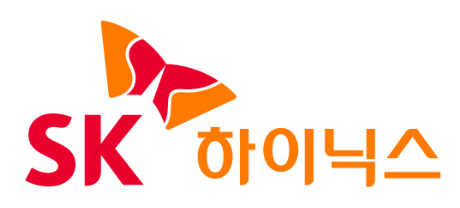

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/img/03/SK-hynix_RGB_KR.jpg'),cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    
show_image(image)

* Horizontal(좌우), Vertical(상하) 반전

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Horizontal Flip(좌우 반전)을 적용. 
data_generator = ImageDataGenerator(horizontal_flip=True)

In [6]:
image_batch = np.expand_dims(image, axis=0)
# ImageDataGenerator는 여러개의 image를 입력으로 받아서 3차원이 아니라 batch를 포함한 4차원 array를 입력받는다.
# 따라서 차원을 증가시켜야한다.
print('image_batch shape:', image_batch.shape)

image_batch shape: (1, 227, 522, 3)


In [7]:
data_generator.fit(image_batch)
# ImageDataGenerator 적용. 
data_gen_iter = data_generator.flow(image_batch)
# fit()후 flow()로 image batch를 넣어주어야한다.

In [8]:
aug_image_batch = next(data_gen_iter)
# next로 iter를 호출

In [9]:
aug_image = np.squeeze(aug_image_batch)
# 4차원으로 늘려준 것을 다시 3차원으로 변경
print('aug_image shape:', aug_image.shape)

aug_image shape: (227, 522, 3)


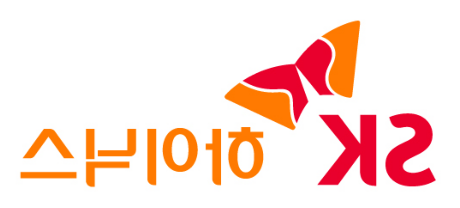

In [12]:
aug_image = aug_image.astype('int')
# float을 다시 int로 변경
show_image(aug_image)
# 바뀔때도 있고 안 바뀔때도 있다.

* 4번 적용시켜서 좌우반전이 잘 적용되고 있는지 확인

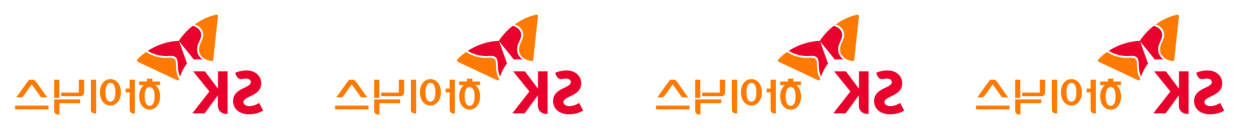

In [13]:
N_IMAGES = 4
fig, axs = plt.subplots(nrows=1, ncols=N_IMAGES, figsize=(22, 8))

for i in range(N_IMAGES):
    aug_image_batch = next(data_gen_iter)
    aug_image = np.squeeze(aug_image_batch)
    aug_image = aug_image.astype('int')
    axs[i].imshow(aug_image)
    axs[i].axis('off')

* 함수화

In [14]:
def show_aug_image_batch(image, data_generator, n_images=4, to_int=True):
    
    image_batch = np.expand_dims(image, axis=0)
    # 이미지 차원 늘려주고
    data_generator.fit(image_batch)
    # 배치로 fit해주고
    data_gen_iter = data_generator.flow(image_batch)
    # flow로 넣어주고
    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(6*n_images, 8))
    # 여러개 이미지 보여주기 위해서 틀 만들고
    for i in range(n_images):
        aug_image_batch = next(data_gen_iter)
        # 이미지 한개씩 가져오고
        aug_image = np.squeeze(aug_image_batch)
        # 다시 차원을 줄여주고
        if(to_int):
            aug_image = aug_image.astype('int')
            # 정수형으로 바꾸고
        axs[i].imshow(aug_image)
        #시각화
        axs[i].axis('off')
        # 축 끄기

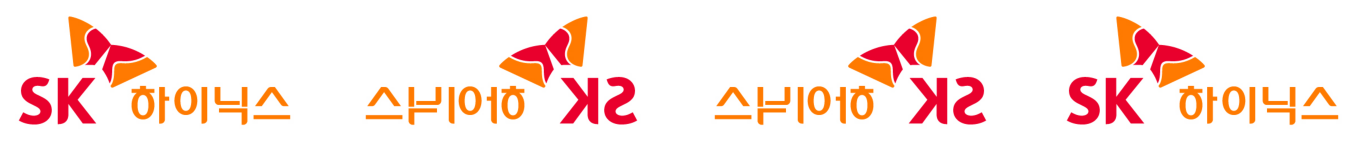

In [15]:
data_generator = ImageDataGenerator(horizontal_flip=True)
# Horizontal Flip(좌우 반전)을 적용.
show_aug_image_batch(image, data_generator, n_images=4)

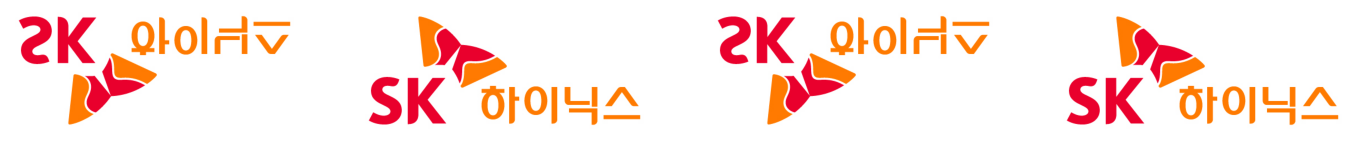

In [16]:
data_generator = ImageDataGenerator(vertical_flip=True)
# Vertical Flip(위아래 반전)을 적용.
show_aug_image_batch(image, data_generator, n_images=4)

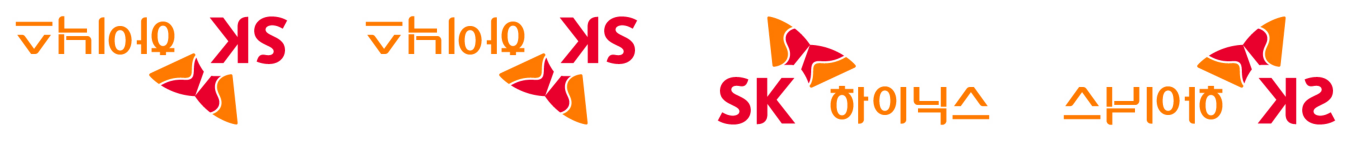

In [17]:
# 두개를 함께 적용. 
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

* 이미지 Roration(회전)

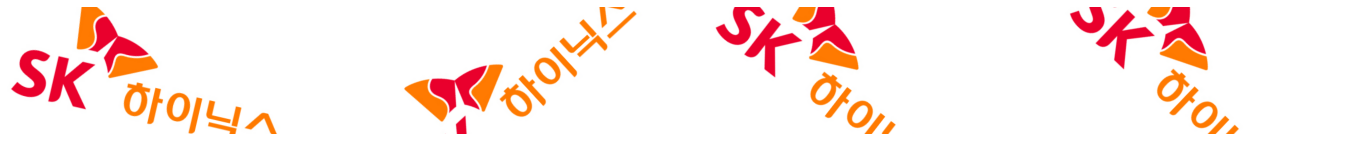

In [18]:
data_gen = ImageDataGenerator(rotation_range=45)
# 회전 범위를 -45~45로 설정가능
show_aug_image_batch(image, data_gen, n_images=4)

* 이미지 Shift(이동)

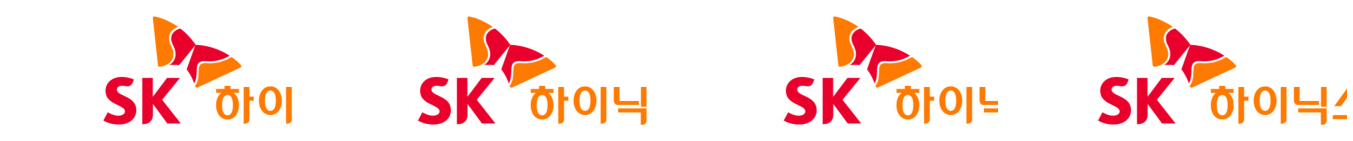

In [19]:
#좌우 이동
data_generator = ImageDataGenerator(width_shift_range=0.4)
# width_shift_range에 따라 랜덤하게 이동
show_aug_image_batch(image, data_generator, n_images=4) 
# 40% 까지 이동할 수 있음.
# 빈 영역은 복사하여 채워진다.

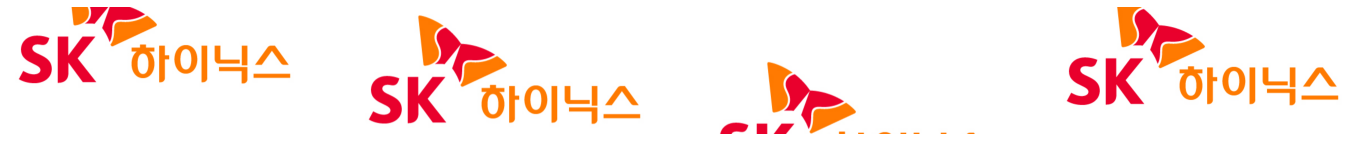

In [20]:
# 위아래 이동
data_generator = ImageDataGenerator(height_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

* 이미지 Shift(이동) 이후 빈 공간 채우기

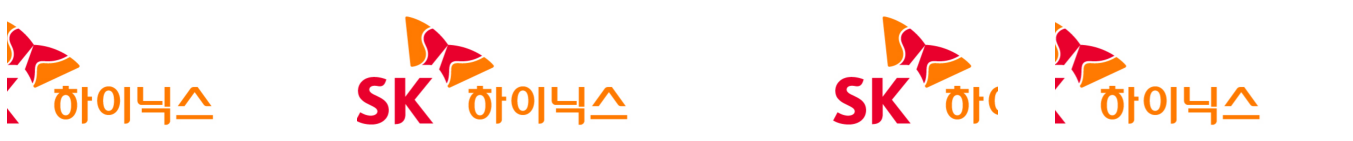

In [21]:
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='nearest')
show_aug_image_batch(image, data_generator, n_images=4)
# 빈공간을 가장 가까운 곳의 픽셀값으로 채움. 

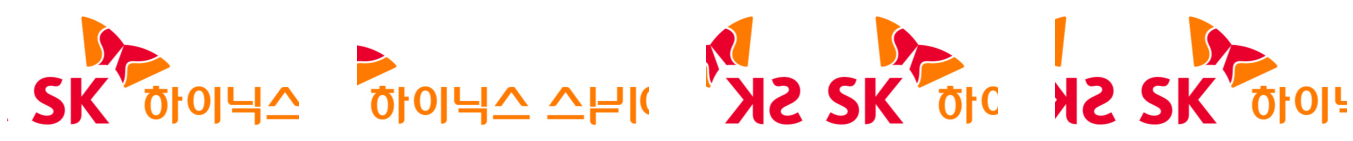

In [22]:
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='reflect')
show_aug_image_batch(image, data_generator, n_images=4)
# 빈공간 만큼의 영역을 근처 공간으로 채움. 

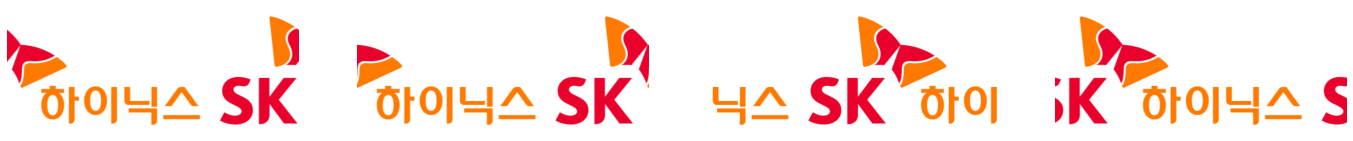

In [23]:
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='wrap')
show_aug_image_batch(image, data_generator, n_images=4)
# 빈공간을 이동으로 잘려나간 이미지로 채움

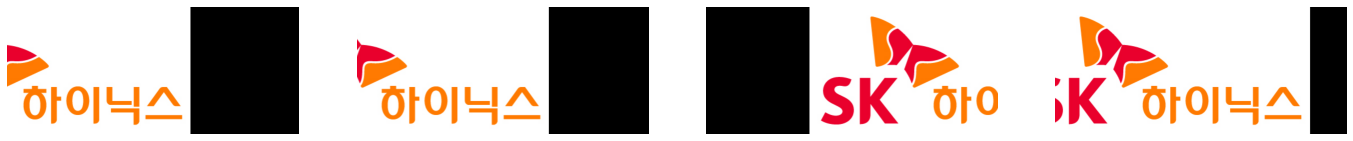

In [24]:
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)
# 특정 픽셀값으로 채움. 이때 특정 픽셀값은 cval 값으로 채움

* 이미지 Scale(확대) 적용

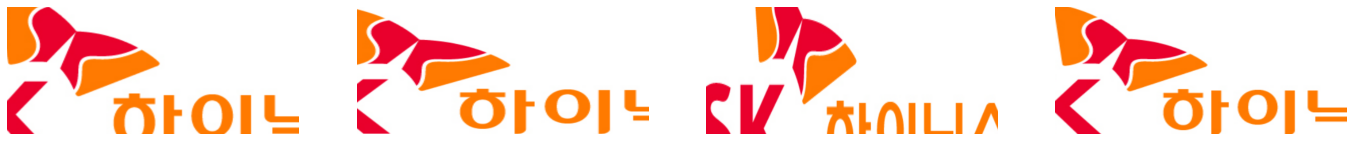

In [25]:
# Zoom In(확대)
data_generator = ImageDataGenerator(zoom_range=[0.5, 0.9])
show_aug_image_batch(image, data_generator, n_images=4)

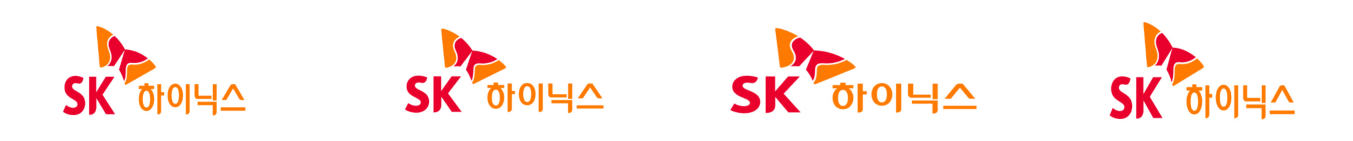

In [26]:
# Zoom out(축소)
data_generator = ImageDataGenerator(zoom_range=[1.1, 1.5])
show_aug_image_batch(image, data_generator, n_images=4)

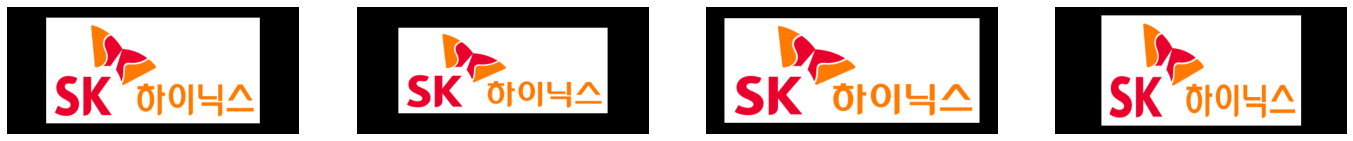

In [27]:
# Zoom out 시 비어 있는 공간 채우기 
data_generator = ImageDataGenerator(zoom_range=[1.1, 1.5], fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)

* Shear 적용

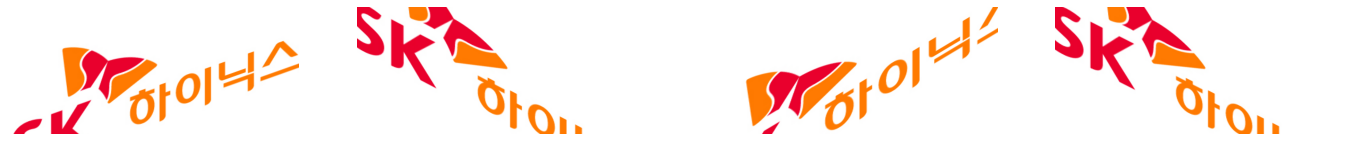

In [28]:
data_generator = ImageDataGenerator(shear_range=45)
show_aug_image_batch(image, data_generator, n_images=4)

* 밝기 조정

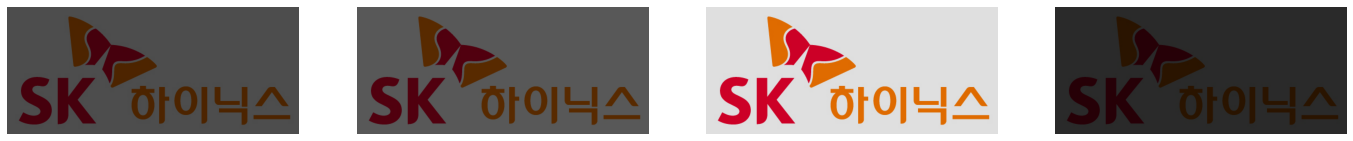

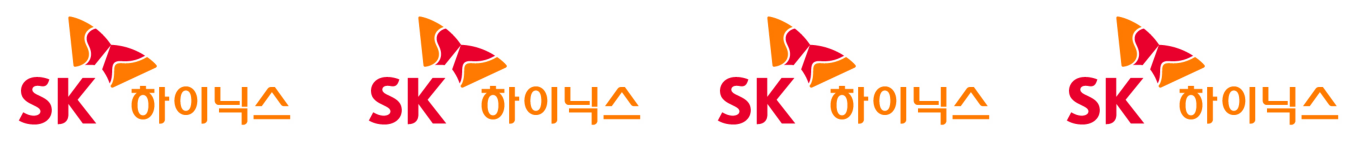

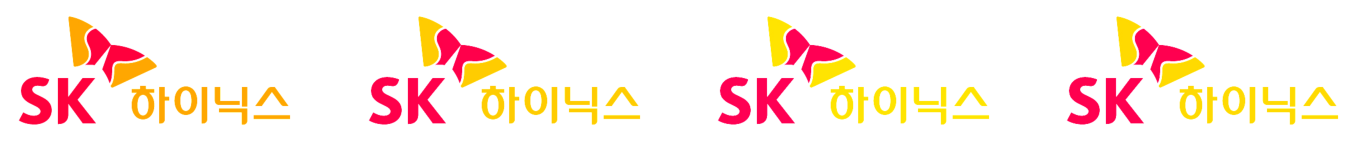

In [29]:
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
#보다 크면 원본 이미지 보다 밝음
show_aug_image_batch(image, data_generator, n_images=4)
data_generator = ImageDataGenerator(brightness_range=(1.0, 1.0))
show_aug_image_batch(image, data_generator, n_images=4)
data_generator = ImageDataGenerator(brightness_range=(1.0, 2.0))
show_aug_image_batch(image, data_generator, n_images=4)

* Channel Shift(색갈 채널 변경)

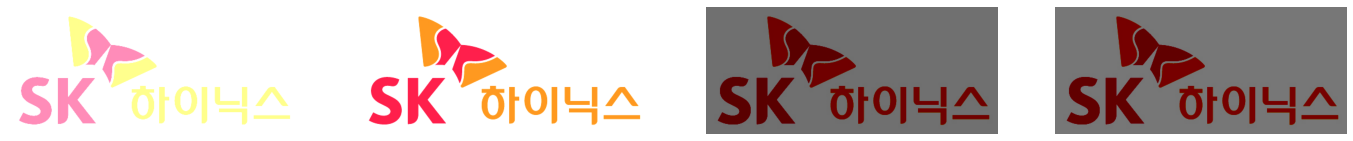

In [30]:
data_generator = ImageDataGenerator(channel_shift_range=150.0)
# channel 값을 0~255사이로 임의 변환
show_aug_image_batch(image, data_generator, n_images=4)

* 전부 적용

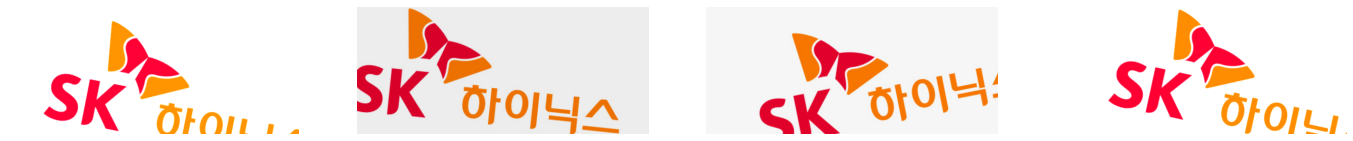

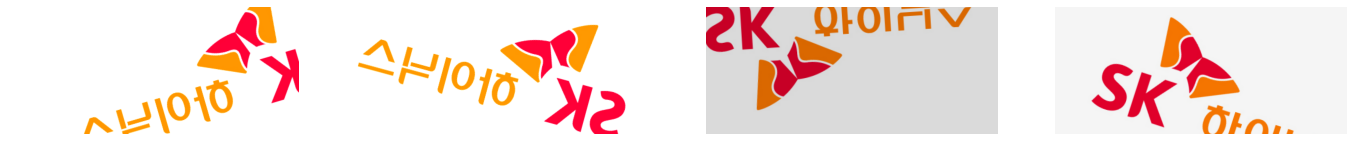

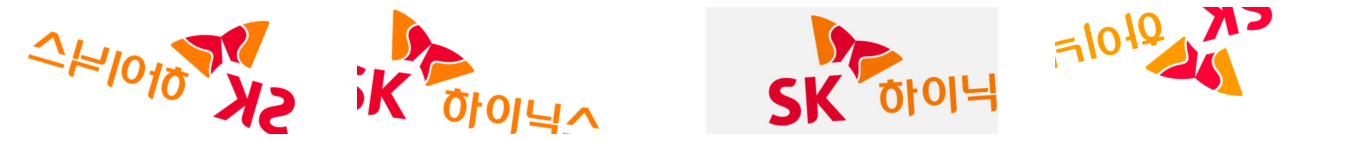

In [31]:
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1.3),
    horizontal_flip=True,
    vertical_flip=True,
    #rescale=1/255.0
)

show_aug_image_batch(image, data_generator, n_images=4)
show_aug_image_batch(image, data_generator, n_images=4)
show_aug_image_batch(image, data_generator, n_images=4)